<a href="https://colab.research.google.com/github/IagoConrado/colab-notebooks/blob/master/Agrupamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Previsão de insuficiência cardíaca**


*   Link do dataset: [Heart Failure Prediction](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data).
*   Os dados do dataset descrevem características dos pacientes e se eles faleceram durante o acompanhamento.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Imports**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score, 
    adjusted_rand_score,
    adjusted_mutual_info_score,
    fowlkes_mallows_score
)

## **Leitura dos dados**

In [3]:
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/heart_failure.csv')
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## **Limpeza e organização dos dados**

In [4]:
#verificar se existem valores NAN, ? ou dados faltantes
dados = dados.dropna()

In [5]:
#excluir a coluna 'time' já que só é possível ter a informação dela apos receber informações na coluna 'DEATH_EVENT'
dados = dados.drop(columns=['time'])
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [6]:
#re-escala dos dados
dados = (dados - dados.min())/(dados.max()-dados.min())

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    float64
 2   creatinine_phosphokinase  299 non-null    float64
 3   diabetes                  299 non-null    float64
 4   ejection_fraction         299 non-null    float64
 5   high_blood_pressure       299 non-null    float64
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    float64
 9   sex                       299 non-null    float64
 10  smoking                   299 non-null    float64
 11  DEATH_EVENT               299 non-null    float64
dtypes: float64(12)
memory usage: 30.4 KB


## **Organizando dados para modelagem**

In [8]:
x = dados.iloc[:,:-1]
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0


In [9]:
y = dados.DEATH_EVENT
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: DEATH_EVENT, dtype: float64

## **Criando e treinando o modelo**

In [10]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
kmeans_labels = kmeans.predict(x)
kmeans_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1], dtyp

In [12]:
x = x.reset_index(drop=True)

In [13]:
grupos = pd.DataFrame(kmeans_labels)
x.insert((x.shape[1]),'DEATH_EVENT', grupos)

In [14]:
death_event0 = x[x['DEATH_EVENT']== 0]
death_event1 = x[x['DEATH_EVENT']== 1]

In [15]:
plt.rcParams["figure.figsize"] = (8,5)

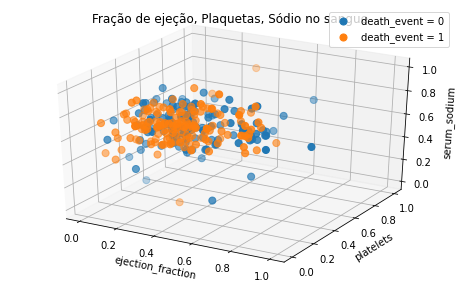

In [16]:
ax = plt.axes(projection='3d')
ax.scatter3D(death_event0.ejection_fraction,death_event0.platelets,death_event0.serum_sodium,s=50,label='death_event = 0')
ax.scatter3D(death_event1.ejection_fraction,death_event1.platelets,death_event1.serum_sodium,s=50,label='death_event = 1')
plt.legend()
ax.set_xlabel('ejection_fraction')
ax.set_ylabel('platelets')
ax.set_zlabel('serum_sodium')
plt.title('Fração de ejeção, Plaquetas, Sódio no sangue')
plt.show()

Com o gráfico é possivel perceber que os atributos escolhidos não são suficientes para distinguir se o resultado do **DEATH_EVENT** será 0 ou 1.

In [17]:
plt.rcParams["figure.figsize"] = (25,20)

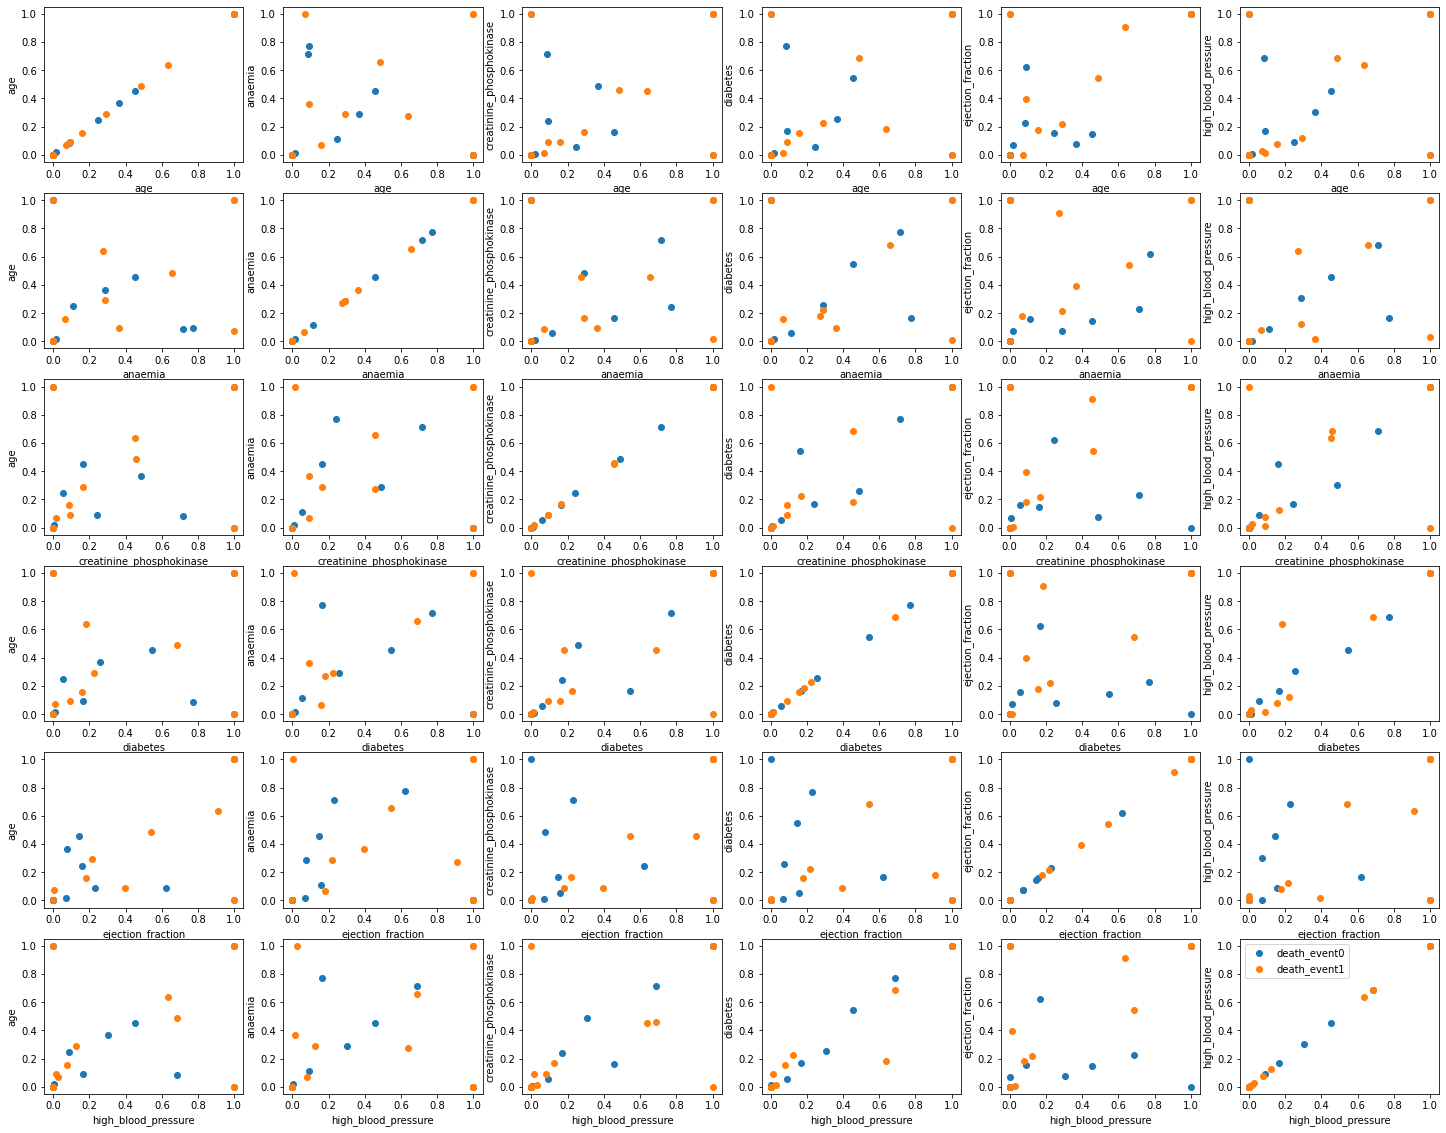

In [18]:
fig, axs = plt.subplots(6,6)
for i in range(6):
  for j in range(6):
    axs[i,j].scatter(death_event0.iloc[i],death_event0.iloc[j],label='death_event0')
    axs[i,j].scatter(death_event1.iloc[i],death_event1.iloc[j],label='death_event1')
    axs[i,j].set(xlabel=x.columns[i],ylabel=x.columns[j])
plt.legend()
plt.show()

In [19]:
acuracia = accuracy_score(y,kmeans_labels)
acuracia

0.5183946488294314

In [20]:
rand_score = adjusted_rand_score(y,kmeans_labels)
rand_score

-0.001691027110055175

In [21]:
mutual_info = adjusted_mutual_info_score(y,kmeans_labels)
mutual_info

-0.0005803210177309687

In [22]:

fm = fowlkes_mallows_score(y,kmeans_labels)
fm

0.5289149607172835

## **Conclusão**

Apesar dos bons resultados obtidos nas outras atividades, é perceptível através dos gráficos e dos diferentes métodos utilizados para calcular o Score do agrupamento realizado que o mesmo não teve muito sucesso, já que tanto o score do Índice Rand Ajustado e o score baseado em informação mútua apresentaram valores negativos indicando um agrupamento ruim, e mesmo o Fowlkes-Mallows score apresentou um valor de aproximadamente 0.529, que não está tão próximo assim do valor ideal que seria 1.